#Plots on Data Aware Grids

**Ravjot Singh**

E-mail: ravjot313@gmail.com

M: +91-9654446404

LinkedIn: https://www.linkedin.com/in/ravjot-singh-1a0777149/

Github: https://github.com/Ravjot03

## Importing the libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [0]:
df = pd.read_csv("college_data.csv")

## Exploratory Data Analysis

In [7]:
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,DEBT_MDN,MEDIAN_HH_INC,ICLEVEL,HIGHDEG,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,14600,49720.22,1,4,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,14250,55735.22,1,4,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,11082,53683.7,1,4,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,15000,58688.62,1,4,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,15274,46065.2,1,4,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INSTNM            6702 non-null   object 
 1   OPEID             6702 non-null   int64  
 2   REGION            6702 non-null   int64  
 3   SAT_AVG_ALL       1387 non-null   float64
 4   PCTPELL           6066 non-null   float64
 5   PCTFLOAN          6066 non-null   float64
 6   ADM_RATE_ALL      2180 non-null   float64
 7   UG                4367 non-null   float64
 8   AVGFACSAL         4104 non-null   float64
 9   COMPL_RPY_5YR_RT  5708 non-null   object 
 10  DEBT_MDN          6681 non-null   object 
 11  MEDIAN_HH_INC     4993 non-null   object 
 12  ICLEVEL           6702 non-null   int64  
 13  HIGHDEG           6702 non-null   int64  
 14  CONTROL           6702 non-null   int64  
 15  WOMENONLY         6368 non-null   float64
 16  MENONLY           6368 non-null   float64


In [9]:
df.describe()

,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,ICLEVEL,HIGHDEG,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition
count,6.702000e+03,6702.000000,1387.000000,6066.000000,6066.000000,2180.000000,4367.000000,4104.000000,6702.000000,6702.000000,6702.000000,6368.000000,6368.000000,6368.000000,5735.00000
mean,1.788528e+06,4.602954,1065.332372,0.502318,0.490676,0.681821,2945.242501,6451.342105,1.811698,2.276783,2.106535,0.006124,0.009893,19.928235,15652.00279
std,3.304120e+06,2.177145,134.879236,0.220404,0.279644,0.204033,4974.178446,2376.043146,0.817686,1.324162,0.839619,0.078024,0.098979,9.618824,8026.04205
min,1.002000e+05,0.000000,708.000000,0.000000,0.000000,0.000000,0.000000,361.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-3.000000,-2138.00000
25%,3.188250e+05,3.000000,981.500000,0.338525,0.285725,0.556846,160.000000,4893.750000,1.000000,1.000000,1.000000,0.000000,0.000000,12.000000,9292.50000
50%,1.005302e+06,5.000000,1048.000000,0.483850,0.548200,0.699771,1013.000000,6222.500000,2.000000,2.000000,2.000000,0.000000,0.000000,21.000000,14952.00000
75%,2.598900e+06,6.000000,1127.000000,0.666700,0.704500,0.823808,3259.500000,7742.000000,3.000000,4.000000,3.000000,0.000000,0.000000,22.000000,20681.50000
max,8.209884e+07,9.000000,1544.000000,1.000000,1.000000,1.000000,46834.000000,26084.000000,3.000000,4.000000,3.000000,1.000000,1.000000,43.000000,93368.00000


## Data Visualization

### FacetGrid

#### FacetGrid Categorical 

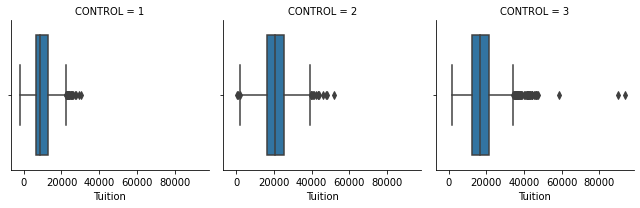

In [14]:
g = sns.FacetGrid(data=df, col="CONTROL")
g.map(sns.boxplot, 'Tuition', order=[1,2,3])
plt.show()

#### Factorplot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


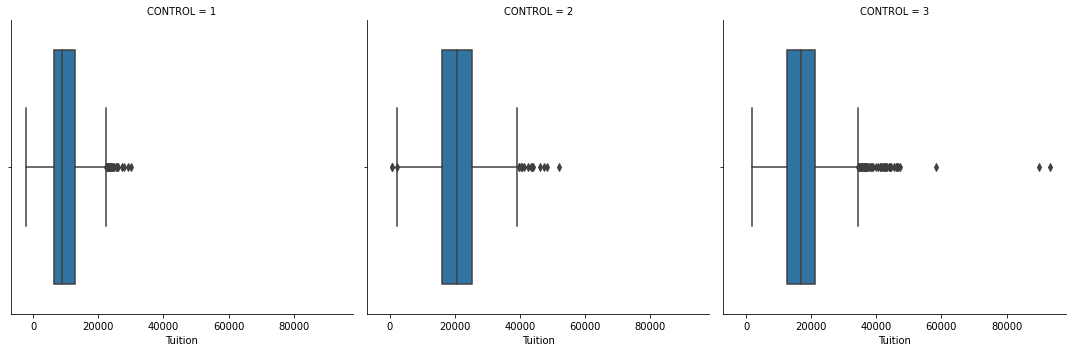

In [19]:
sns.factorplot(x="Tuition", data=df, col="CONTROL", kind='box')
plt.show()

#### FacetGrid for regression

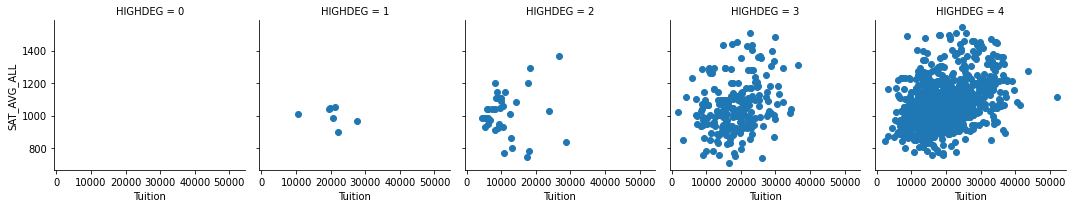

In [21]:
g = sns.FacetGrid(df, col="HIGHDEG")
g.map(plt.scatter,'Tuition','SAT_AVG_ALL')
plt.show()

### lmplot

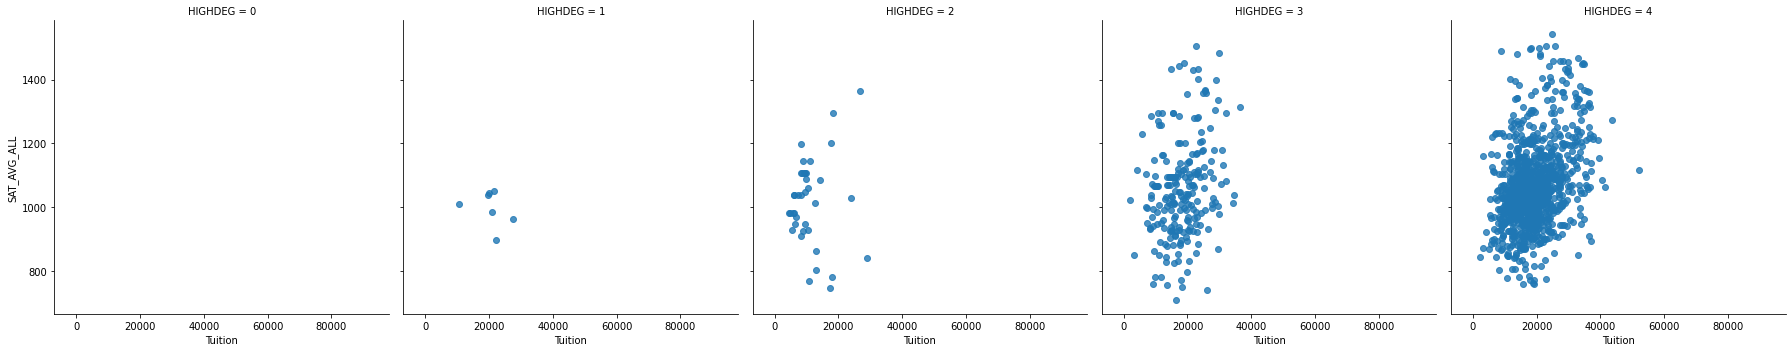

In [25]:
sns.lmplot(data=df, x="Tuition", y="SAT_AVG_ALL",col="HIGHDEG", fit_reg=False)
plt.show()

### PairGrid

In [0]:
df1 = pd.read_csv("us_housing.csv")

#### Creating a PairGrid and Customizing the diagonals

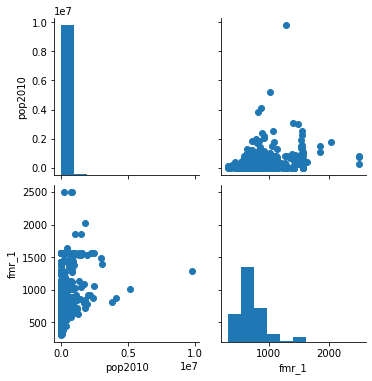

In [35]:
g = sns.PairGrid(data=df1,vars=['pop2010','fmr_1'])
g = g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist)
plt.show()

#### Pairplot

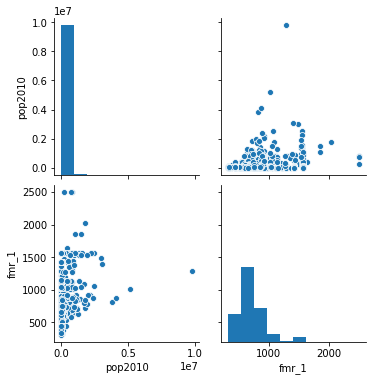

In [39]:
sns.pairplot(data=df1, kind='scatter', diag_kind='hist', vars=['pop2010','fmr_1'])
plt.show()

#### Customizing the Pairplot

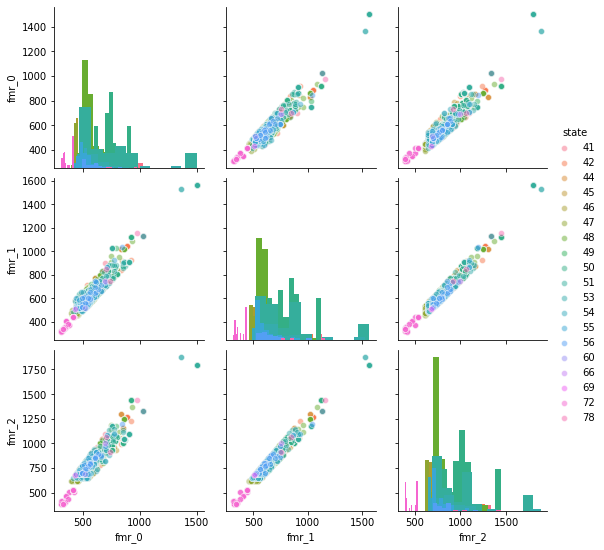

In [45]:
sns.pairplot(df1.query('state > 40'),
vars=["fmr_0",
"fmr_1", "fmr_2"],
hue='state', palette='husl',
plot_kws={'alpha': 0.5}, diag_kind='hist')

### JointGrid

#### Basic JointGrid

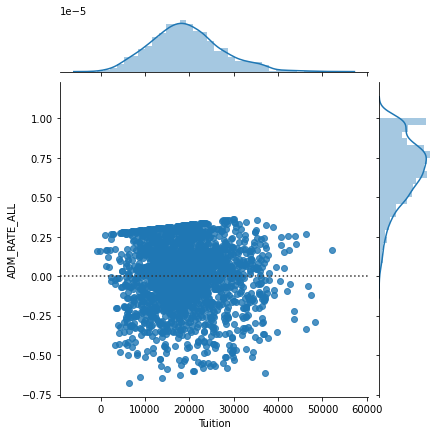

In [53]:
g = sns.JointGrid(data=df, x="Tuition",y="ADM_RATE_ALL")
g.plot(sns.residplot, sns.distplot)
plt.show()

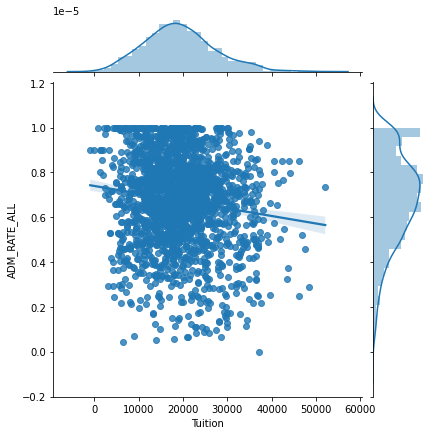

In [54]:
g = sns.JointGrid(data=df, x="Tuition",y="ADM_RATE_ALL")
g.plot(sns.regplot, sns.distplot)
plt.show()

#### Advanced JointGrid

In [0]:
from scipy import stats

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


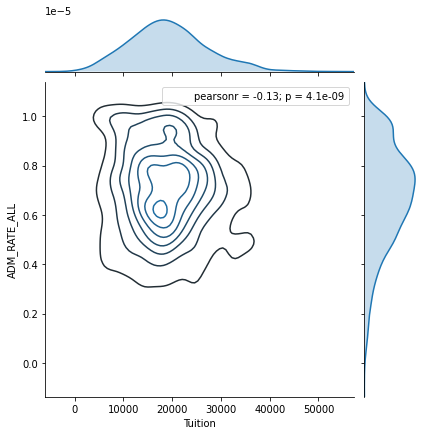

In [57]:
g = sns.JointGrid(data=df, x="Tuition",
y="ADM_RATE_ALL")
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade=True)
g = g.annotate(stats.pearsonr)

#### Jointplot

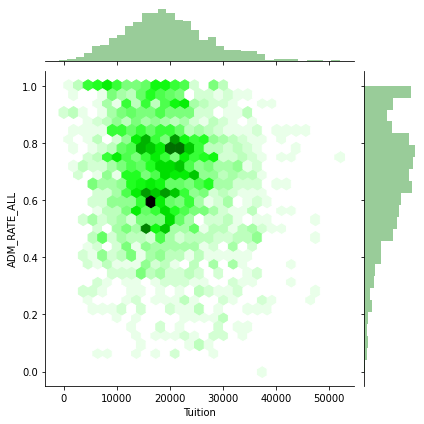

In [59]:
sns.jointplot(data=df, x="Tuition",y="ADM_RATE_ALL", kind='hex', color='g')
plt.show()

#### Cutomizing the Jointplot

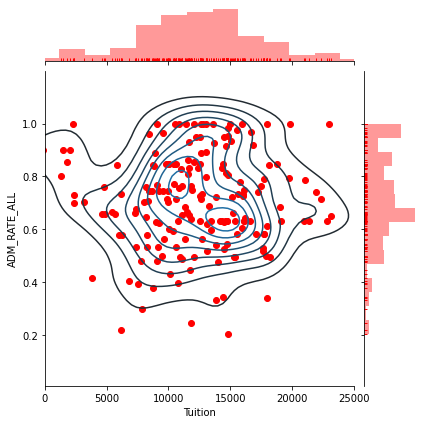

In [62]:
g = (sns.jointplot(x="Tuition",
y="ADM_RATE_ALL", kind='scatter',xlim=(0, 25000),marginal_kws=dict(bins=15,rug=True), color='r',
data=df.query('UG < 2500 & Ownership == "Public"')).plot_joint(sns.kdeplot))
plt.show()